In [1]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

# Social Structure

In [20]:
def draw_graph(G, title, show_communities=False, curved_edges=False, prog='sfdp'):

    cmap = cm.plasma
    factor = 500

    centrality_map = nx.degree_centrality(G)
    # centrality_map = nx.betweenness_centrality(G)
    max_centrality = max(centrality_map.values())
    normalized_centrality_map = dict(map(lambda tup: (tup[0], max(tup[1] / max_centrality, 0.1) * factor), centrality_map.items()))

    nodes = list(normalized_centrality_map.keys())
    sizes = list(normalized_centrality_map.values())

    community_map = community.louvain_communities(G)
    color_map = {n: i for i, c in enumerate(community_map) for n in c }
    colors = [color_map[n] for n in nodes]

    pos = nx.nx_agraph.graphviz_layout(G, prog=prog) # dot, twopi, fdp, sfdp, circo

    fig, ax = plt.subplots(1, figsize=(10, 10))

    greater_nodes = nx.draw_networkx_nodes(
        G, 
        pos, 
        nodelist=nodes,
        node_size=sizes,
        node_color=colors if show_communities else None,
        node_shape='o',
        alpha=1,
        ax=ax,
        cmap=cmap,
        linewidths=1,
        edgecolors='k',
        margins=None,
    )
    greater_nodes.set_zorder(1)

    edges = nx.draw_networkx_edges(
        G, 
        pos,
        width=1.0,
        edge_color='k',
        style='solid',
        alpha=0.8,
        ax=ax,
        arrows=True,
        nodelist=nodes,
        node_size=sizes,
        node_shape='o',
        connectionstyle='arc3, rad=0.3' if curved_edges else 'arc3',
    )

    # edges.set_zorder(-1)
    for c in edges:
        c.set_zorder(-1)

    ax.spines['top'].set_color('k')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['right'].set_color('k')
    ax.spines['right'].set_linewidth(1)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(1)
    ax.set_title(f'{title}', fontweight='semibold', fontsize=20)
    ax.grid(False)
    
    fig.set_facecolor('white')
    fig.tight_layout()
    
    plt.show()


# Nodes & Edges

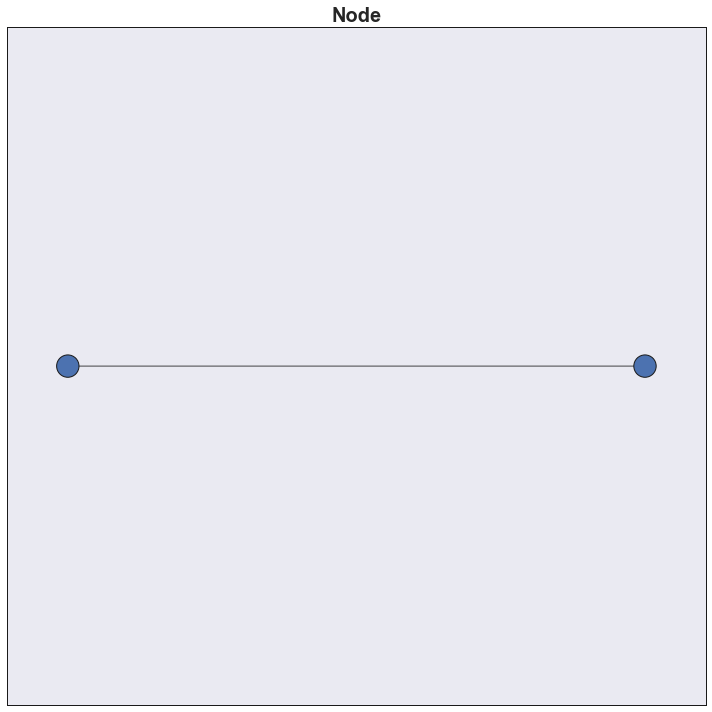

In [21]:
G = nx.Graph()
G.add_edge(0, 1)
draw_graph(G, 'Node')

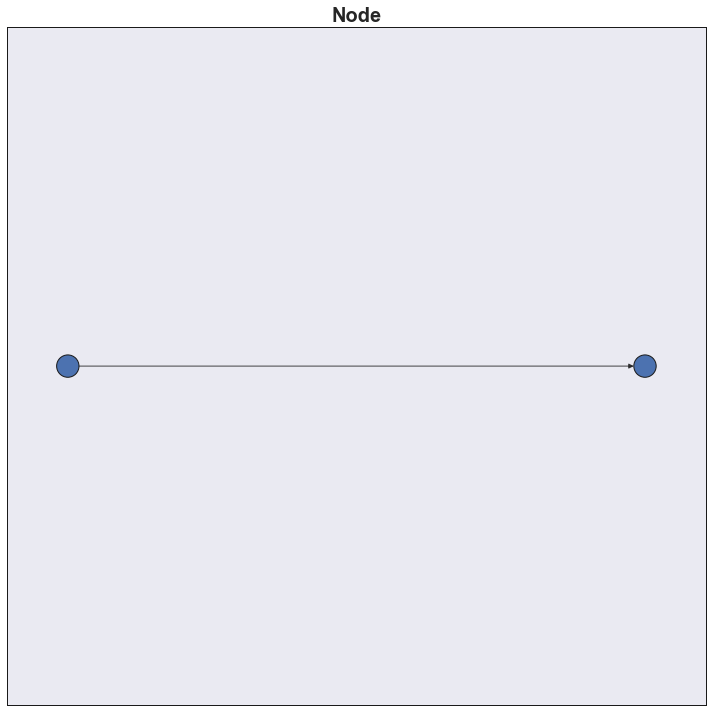

In [23]:
G = nx.DiGraph()
G.add_edge(0, 1)
draw_graph(G, 'Node')

# Complete

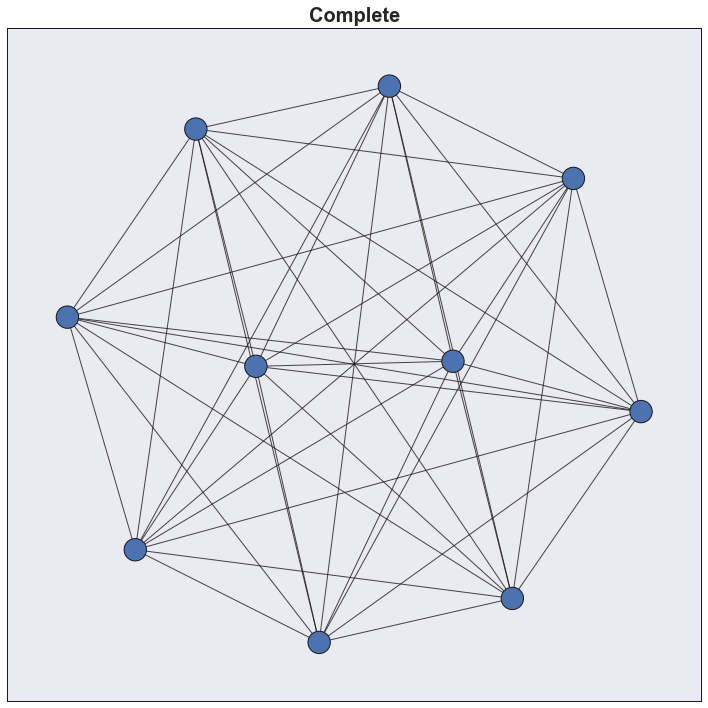

In [78]:
G = nx.complete_graph(10)

draw_graph(G, 'Complete')

# Circle

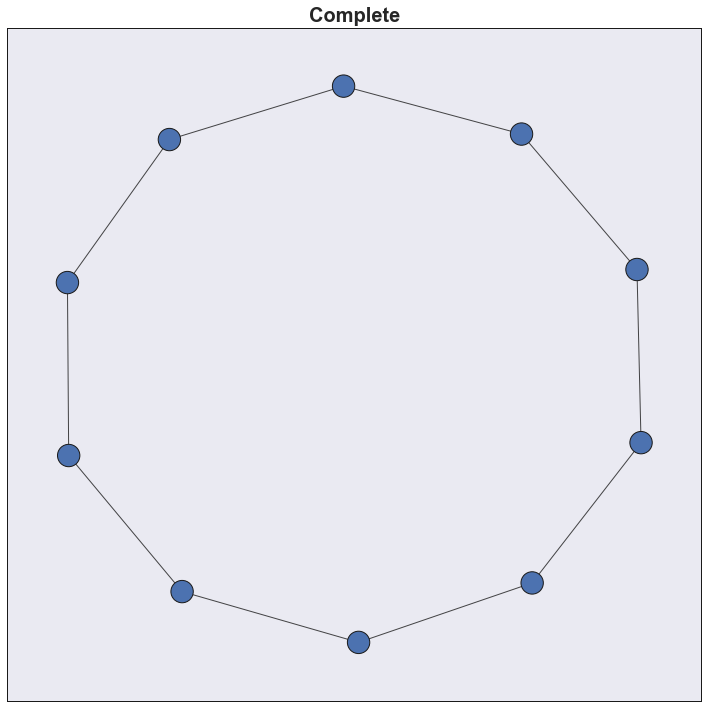

In [79]:
G = nx.path_graph(10)
G.add_edge(0, 9)

draw_graph(G, 'Complete')

# Star

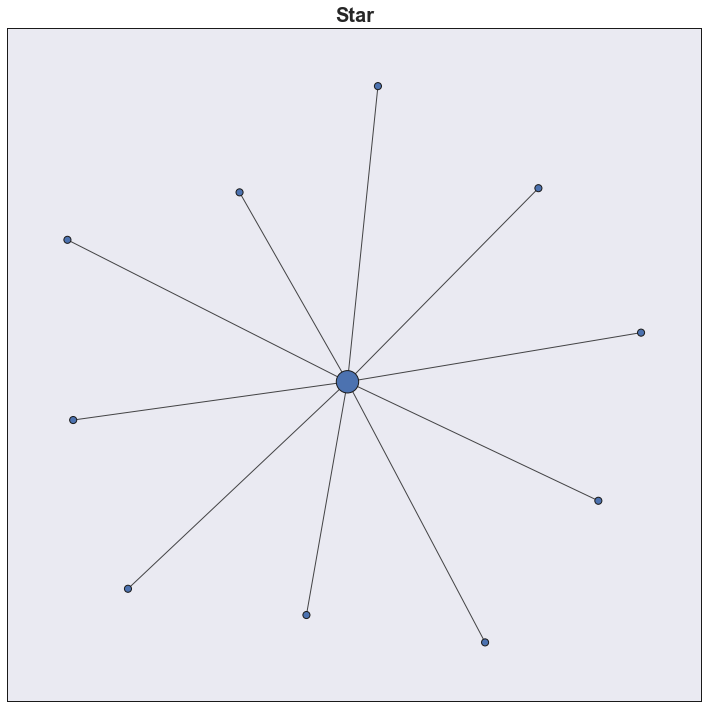

In [80]:
G = nx.star_graph(10)

draw_graph(G, 'Star')

# Organizations

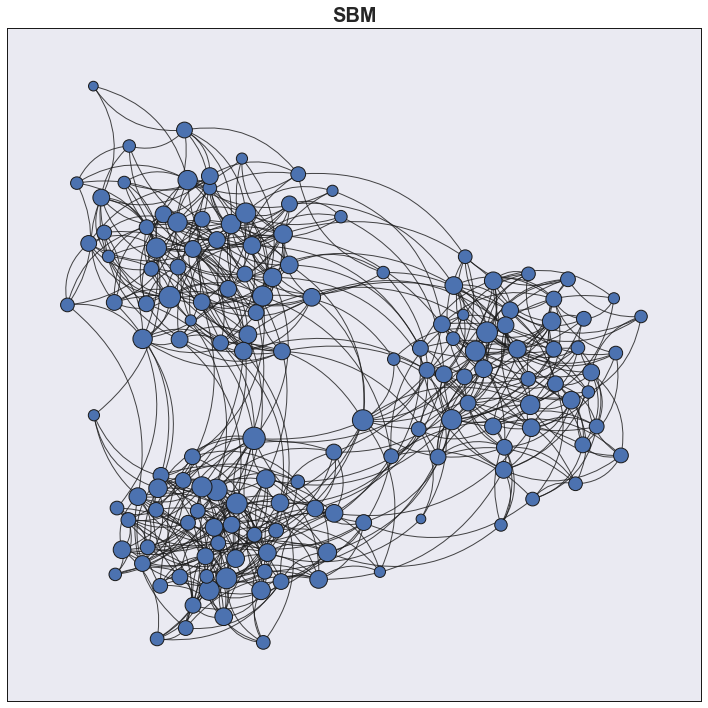

In [81]:

sizes = [50, 50, 50]
probs = [
    [0.15, 0.01, 0.01], 
    [0.01, 0.15, 0.01], 
    [0.01, 0.01, 0.15]
]
G = nx.stochastic_block_model(sizes, probs, seed=0)

draw_graph(G, 'SBM', curved_edges=True)

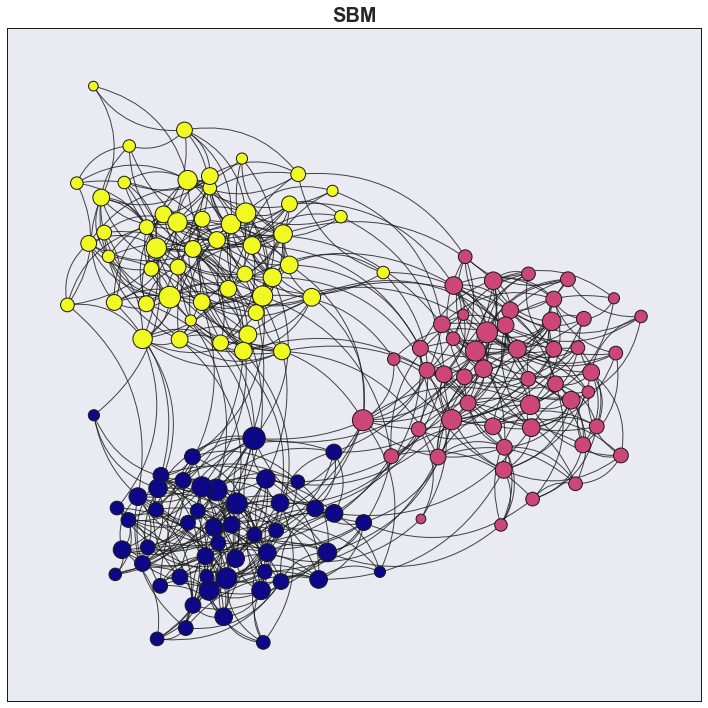

In [86]:

sizes = [50, 50, 50]
probs = [
    [0.15, 0.01, 0.01], 
    [0.01, 0.15, 0.01], 
    [0.01, 0.01, 0.15]
]
G = nx.stochastic_block_model(sizes, probs, seed=0)

draw_graph(G, 'SBM', show_communities=True, curved_edges=True)

# Centrality

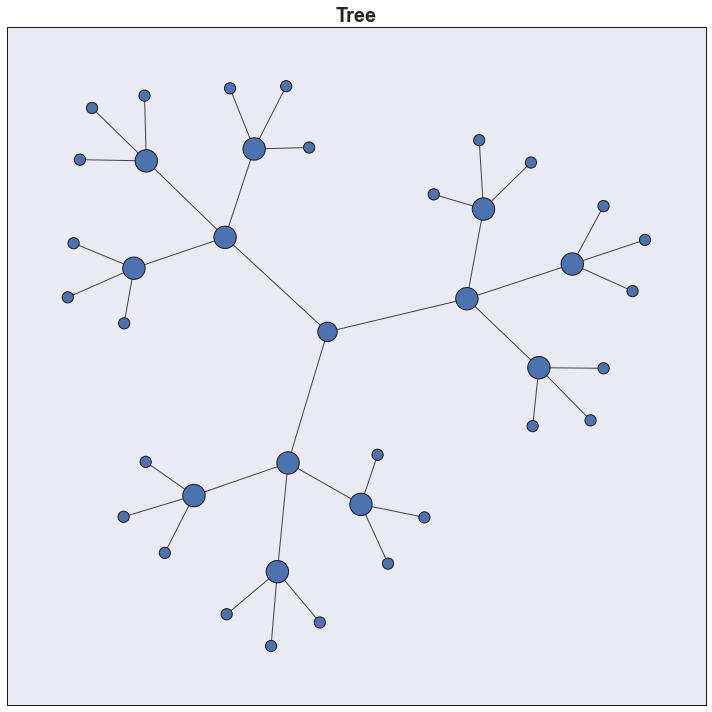

In [5]:
G = nx.balanced_tree(3, 3)

draw_graph(G, 'Tree')

# Cliques

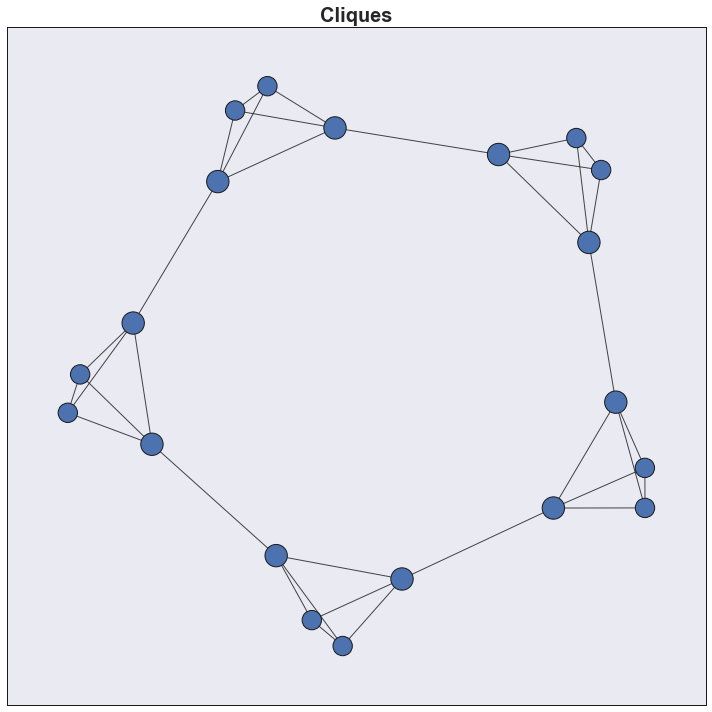

In [8]:
G = nx.ring_of_cliques(5, 4)

draw_graph(G, 'Cliques')

# Structural hole

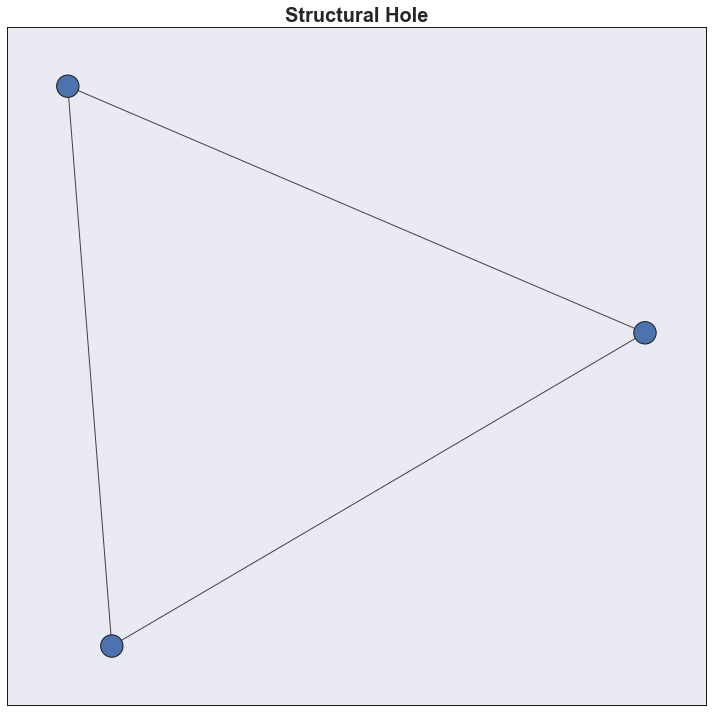

In [12]:
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,0)])

draw_graph(G, 'Structural Hole')

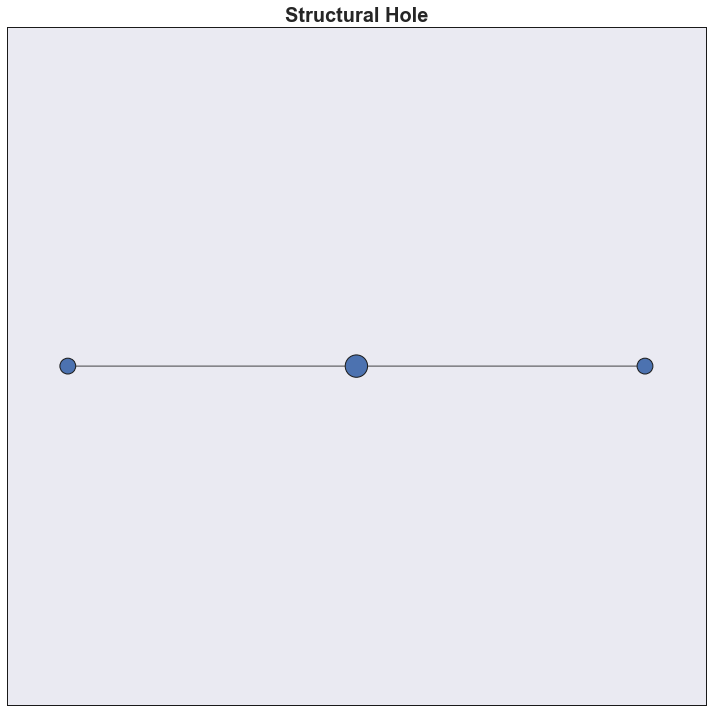

In [17]:
G = nx.Graph()
G.add_edges_from([(3,4), (4,5)])


draw_graph(G, 'Structural Hole', prog='circo')